In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
link_ratings = "./ratings.csv"
link_movies = "./movies.csv"

# Load dataset into pandas dataframe format
ratings = pd.read_csv(link_ratings,sep=',')
movies = pd.read_csv(link_movies,sep=',')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


# Explore Dataset

In [ ]:
len(ratings)

100836

In [ ]:
len(movies)

9742

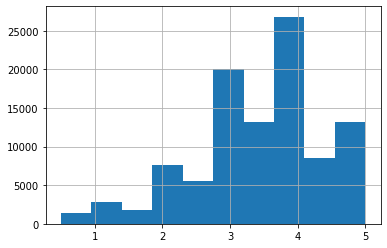

In [ ]:
ratings.rating.hist()

In [ ]:
np.sort(ratings.rating.unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

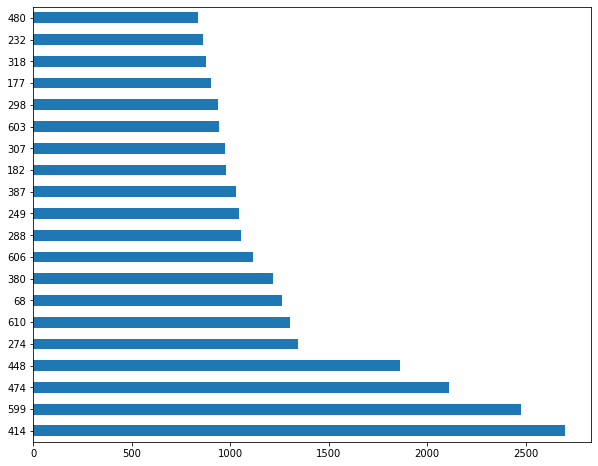

In [ ]:
# Plot top20 user ratings count
plt.figure(figsize=(10, 8))
ratings["userId"].value_counts()[:20].plot(kind='barh')

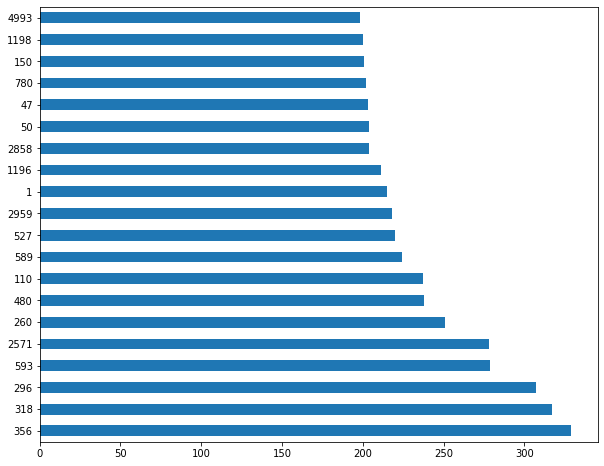

In [ ]:
# Plot top20 movie ratings count
plt.figure(figsize=(10, 8))
ratings["movieId"].value_counts()[:20].plot(kind='barh')

In [ ]:
ratings["movieId"].value_counts()[:20].index.tolist()

[356,
 318,
 296,
 593,
 2571,
 260,
 480,
 110,
 589,
 527,
 2959,
 1,
 1196,
 2858,
 50,
 47,
 780,
 150,
 1198,
 4993]

In [ ]:
popular_movies = ratings["movieId"].value_counts()[:20].index.tolist()
for id in popular_movies:
  print(movies[movies["movieId"]==id]["title"].values[0])

Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)
Star Wars: Episode IV - A New Hope (1977)
Jurassic Park (1993)
Braveheart (1995)
Terminator 2: Judgment Day (1991)
Schindler's List (1993)
Fight Club (1999)
Toy Story (1995)
Star Wars: Episode V - The Empire Strikes Back (1980)
American Beauty (1999)
Usual Suspects, The (1995)
Seven (a.k.a. Se7en) (1995)
Independence Day (a.k.a. ID4) (1996)
Apollo 13 (1995)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Lord of the Rings: The Fellowship of the Ring, The (2001)


# Install Surprise Library

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 4.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630177 sha256=6f469f70bafa4c91963d6b8b383cb694a4426ab0a9c17c342f843126621f452c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


# Recommendation with Surprise Built-In Dataset

In [ ]:
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
rmse = accuracy.rmse(predictions)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
RMSE: 0.9359


In [ ]:
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9463  0.9340  0.9399  0.9346  0.9344  0.9378  0.0047  
MAE (testset)     0.7469  0.7360  0.7410  0.7335  0.7363  0.7387  0.0047  
Fit time          4.94    4.93    4.94    4.90    4.96    4.94    0.02    
Test time         0.34    0.15    0.25    0.19    0.15    0.21    0.07    


In [ ]:
results

{'fit_time': (4.9439637660980225,
  4.9289772510528564,
  4.942934513092041,
  4.896846771240234,
  4.963477373123169),
 'test_mae': array([0.74685893, 0.73603201, 0.74098161, 0.73349775, 0.73633519]),
 'test_rmse': array([0.9463089 , 0.93400885, 0.93985496, 0.93458787, 0.93443579]),
 'test_time': (0.3356645107269287,
  0.14791464805603027,
  0.24577546119689941,
  0.19008636474609375,
  0.15389800071716309)}

In [ ]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

Average MAE:  0.7387410973313937
Average RMSE:  0.9378392751943613


# Recommendation with Custom Dataset

In [ ]:
df = ratings[["userId","movieId","rating"]]
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
min_rating = df["rating"].min()
max_rating = df["rating"].max()

print("Rating range: {0} to {1}".format(min_rating, max_rating))

Rating range: 0.5 to 5.0


In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
rmse = accuracy.rmse(predictions)

RMSE: 0.8666


In [ ]:
predictions[0]

Prediction(uid=543, iid=4545, r_ui=4.0, est=4.071283483351532, details={'was_impossible': False})

In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8683  0.8752  0.8708  0.8746  0.8779  0.8734  0.0034  
MAE (testset)     0.6682  0.6736  0.6698  0.6725  0.6724  0.6713  0.0020  
Fit time          6.16    5.04    5.08    5.05    6.05    5.48    0.52    
Test time         0.42    0.14    0.24    0.14    0.24    0.24    0.10    


In [ ]:
results

{'fit_time': (6.159815073013306,
  5.03511643409729,
  5.077436208724976,
  5.049232721328735,
  6.054659605026245),
 'test_mae': array([0.66820918, 0.67355712, 0.66984124, 0.67248965, 0.67237275]),
 'test_rmse': array([0.86831934, 0.87517216, 0.87075837, 0.87459041, 0.87791571]),
 'test_time': (0.4191620349884033,
  0.14217329025268555,
  0.24471187591552734,
  0.1366443634033203,
  0.24410152435302734)}

In [ ]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

Average MAE:  0.6712939883682785
Average RMSE:  0.8733511960600768


# Comparison Among RecSys Algorithms

In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# Define algo names
algo_names = ["SVD", "KNN"]

# Initiate variable for saving results
rmse_results = []
mae_results = []

for algo_name in algo_names:
  # Use algorithm based on algo names
  if algo_name == "SVD":
    algo = SVD()
  elif algo_name == "KNN":
    sim_options = {
        'name': 'cosine'
    }
    algo = KNNBasic(sim_options=sim_options)

  # Run 5-fold cross-validation and print results.
  results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

  # Save results
  rmse_results.append(np.average(results["test_rmse"]))
  mae_results.append(np.average(results["test_mae"]))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8758  0.8749  0.8757  0.8745  0.8763  0.8754  0.0007  
MAE (testset)     0.6750  0.6718  0.6723  0.6720  0.6732  0.6728  0.0012  
Fit time          5.79    13.24   6.54    5.14    5.14    7.17    3.08    
Test time         0.34    0.28    0.27    0.20    0.16    0.25    0.06    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9708  0.9759  0.9774  0.9731  0.9745 

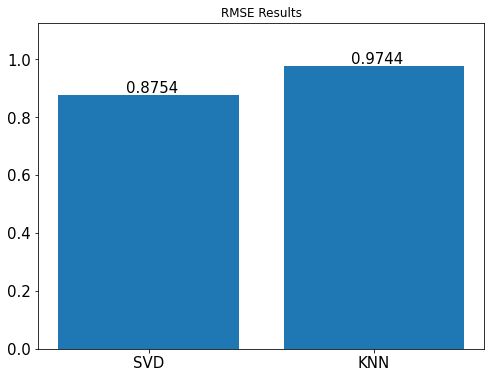

In [ ]:
# Plot RMSE Results

plt.figure(figsize=(8, 6))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
# plt.xticks(rotation=50)
plt.bar(algo_names, rmse_results)
plt.title("RMSE Results")
for index, value in enumerate(rmse_results):
    plt.text(index-0.1, value+0.01, str(np.round(value,4)),fontsize=15)

scale_factor = 1.1
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.show()

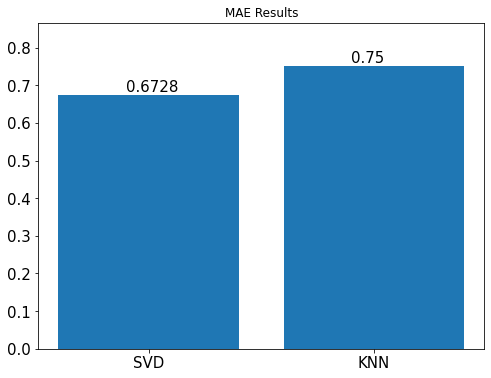

In [ ]:
# Plot MAE Results

plt.figure(figsize=(8, 6))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
# plt.xticks(rotation=50)
plt.bar(algo_names, mae_results)
plt.title("MAE Results")
for index, value in enumerate(mae_results):
    plt.text(index-0.1, value+0.01, str(np.round(value,4)),fontsize=15)

scale_factor = 1.1
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.show()

# Hyperparameter Tuning

In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import GridSearchCV

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

param_grid = {
    'n_factors': [20, 50, 100],
    'n_epochs': [5, 10]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8779388759475137
{'n_factors': 20, 'n_epochs': 10}


In [ ]:
best_factor = gs.best_params['rmse']['n_factors']
best_factor

20

In [ ]:
best_epoch = gs.best_params['rmse']['n_epochs']
best_epoch

10

# Top-N Recommendation

In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD(n_factors=best_factor, n_epochs=best_epoch)

# Train the algorithm on the trainset
algo.fit(trainset)

In [ ]:
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
# Define user ID
userID = 1

In [ ]:
# Get a list of all movie IDs from dataset
movie_ids = df["movieId"].unique()
movie_ids

array([     1,      3,      6, ..., 160836, 163937, 163981])

In [ ]:
len(movie_ids)

9724

In [ ]:
movie_ids_user = df.loc[df["userId"] == userID, "movieId"]
movie_ids_user

0         1
1         3
2         6
3        47
4        50
       ... 
227    3744
228    3793
229    3809
230    4006
231    5060
Name: movieId, Length: 232, dtype: int64

In [ ]:
movie_ids_to_pred = np.setdiff1d(movie_ids, movie_ids_user)

In [ ]:
test_set = [[userID, movie_id, 4] for movie_id in movie_ids_to_pred]

In [ ]:
predictions = algo.test(test_set)

In [ ]:
predictions[0]

Prediction(uid=1, iid=2, r_ui=4, est=4.2139383886694235, details={'was_impossible': False})

In [ ]:
pred_ratings = np.array([pred.est for pred in predictions])
pred_ratings

array([4.21393839, 3.9912567 , 3.89261993, ..., 4.23663386, 4.23663386,
       4.30829843])

In [ ]:
n_items = 10

In [ ]:
print("Top {0} item recommendations for user {1}:".format(n_items, userID))
index_max = (-pred_ratings).argsort()[:n_items]
for i in index_max:
    movie_id = movie_ids_to_pred[i]
    print(movies[movies["movieId"]==movie_id]["title"].values[0], pred_ratings[i])

Top 10 item recommendations for user 1:
Rear Window (1954) 5.0
Shawshank Redemption, The (1994) 5.0
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) 5.0
Lawrence of Arabia (1962) 4.979537625518497
Great Escape, The (1963) 4.975100214005041
Godfather: Part II, The (1974) 4.9659378630314945
One Flew Over the Cuckoo's Nest (1975) 4.96103776015653
Casablanca (1942) 4.958528826067361
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001) 4.9349406490623995
Snatch (2000) 4.9339305618257825
